In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
!unrar x "/content/drive/MyDrive/TRAIN.rar" "/content/drive/MyDrive"
!unrar x "/content/drive/MyDrive/TEST.rar" "/content/drive/MyDrive"

In [2]:
pip install imutils

  Preparing metadata (setup.py) ... done
  Created wheel for imutils: filename=imutils-0.5.4-py3-none-any.whl size=25858 sha256=7216764ca3ee5fe1e6ca2d287f9563254b64ddf5ed591bb53c84b066e4926036
  Stored in directory: /root/.cache/pip/wheels/86/d7/0a/4923351ed1cec5d5e24c1eaf8905567b02a0343b24aa873df2
Successfully built imutils
Note: you may need to restart the kernel to use updated packages.


In [3]:
#Import libraries
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from imutils import paths
import os
from keras.utils.np_utils import to_categorical
from sklearn.preprocessing import LabelEncoder
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Activation, BatchNormalization
from tensorflow.keras.preprocessing.image import load_img, img_to_array, ImageDataGenerator
from keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import Adam
from keras.layers.core import Dense, Dropout, Flatten
from sklearn.metrics import confusion_matrix, classification_report



In [4]:

target_size=(64,64,3)

# Load dataset

In [5]:
#to create the train image file path for iteration
train_dataset = '/kaggle/input/dnn-data/TRAIN'
train_imagePaths = list(paths.list_images(train_dataset))

#to create the test image file path for iteration
test_dataset = '/kaggle/input/dnn-data/TEST'
test_imagePaths = list(paths.list_images(test_dataset))


In [6]:
train_data=[]
train_labels = []
for img in train_imagePaths:
    print(img)
    print(((train_imagePaths.index(img)+1)/len(train_imagePaths))*100,"%")
    print("=============================================================")
    #Extract the labels from the file names
    label = img.split(os.path.sep)[-2]  
    #Load the input images and preprocess it 
    image = load_img(img,target_size=target_size)
    image = img_to_array(image)
    image = preprocess_input(image)
    #Update the data and label lists
    train_data.append(image)
    train_labels.append(label)
    
    
test_data=[]
test_labels = []
for img in test_imagePaths:
    print(img)
    print(((test_imagePaths.index(img)+1)/len(test_imagePaths))*100,"%")
    print("=============================================================")
    #Extract the labels from the file names
    label = img.split(os.path.sep)[-2]  
    #Load the input images and preprocess it 
    image = load_img(img,target_size=target_size)
    image = img_to_array(image)
    image = preprocess_input(image)
    #Update the data and label lists
    test_data.append(image)
    test_labels.append(label)

/kaggle/input/dnn-data/TRAIN/TRAIN/R/R_8141.jpg
0.006996921354603974 %
/kaggle/input/dnn-data/TRAIN/TRAIN/R/R_9892.jpg
0.013993842709207949 %
/kaggle/input/dnn-data/TRAIN/TRAIN/R/R_5469.jpg
0.020990764063811923 %
/kaggle/input/dnn-data/TRAIN/TRAIN/R/R_3408.jpg
0.027987685418415897 %
/kaggle/input/dnn-data/TRAIN/TRAIN/R/R_9369.jpg
0.03498460677301987 %
/kaggle/input/dnn-data/TRAIN/TRAIN/R/R_7688.jpg
0.041981528127623846 %
/kaggle/input/dnn-data/TRAIN/TRAIN/R/R_8781.jpg
0.048978449482227814 %
/kaggle/input/dnn-data/TRAIN/TRAIN/R/R_4122.jpg
0.055975370836831795 %
/kaggle/input/dnn-data/TRAIN/TRAIN/R/R_7879.jpg
0.06297229219143577 %
/kaggle/input/dnn-data/TRAIN/TRAIN/R/R_4610.jpg
0.06996921354603974 %
/kaggle/input/dnn-data/TRAIN/TRAIN/R/R_9773.jpg
0.07696613490064372 %
/kaggle/input/dnn-data/TRAIN/TRAIN/R/R_4591.jpg
0.08396305625524769 %
/kaggle/input/dnn-data/TRAIN/TRAIN/R/R_3403.jpg
0.09095997760985167 %
/kaggle/input/dnn-data/TRAIN/TRAIN/R/R_7836.jpg
0.09795689896445563 %
/kaggle/input

In [7]:
def unique(list1):
    x = np.array(list1)
    print(np.unique(x))
    return np.unique(x)
class_names=unique(train_labels)

['O' 'R']


We have two class labels 'O' denotes Organic/Bio and 'R' denotes Recyclable

# Scaling the Data to bring it into Standardized format

In [8]:
train_data=np.array(train_data)
test_data=np.array(test_data)
train_data = train_data.astype('float32')/255
test_data = test_data.astype('float32')/255

In [9]:
train_data

array([[[[ 3.9215689e-03,  3.9215689e-03,  3.9215689e-03],
         [ 3.9215689e-03,  3.9215689e-03,  3.9215689e-03],
         [ 3.9215689e-03,  3.9215689e-03,  3.9215689e-03],
         ...,
         [ 3.9215689e-03,  3.9215689e-03,  3.9215689e-03],
         [ 3.9215689e-03,  3.9215689e-03,  3.9215689e-03],
         [ 3.9215689e-03,  3.9215689e-03,  3.9215689e-03]],

        [[ 3.9215689e-03,  3.9215689e-03,  3.9215689e-03],
         [ 3.9215689e-03,  3.9215689e-03,  3.9215689e-03],
         [ 3.9215689e-03,  3.9215689e-03,  3.9215689e-03],
         ...,
         [ 3.9215689e-03,  3.9215689e-03,  3.9215689e-03],
         [ 3.9215689e-03,  3.9215689e-03,  3.9215689e-03],
         [ 3.9215689e-03,  3.9215689e-03,  3.9215689e-03]],

        [[ 3.9215689e-03,  3.9215689e-03,  3.9215689e-03],
         [ 3.9215689e-03,  3.9215689e-03,  3.9215689e-03],
         [ 3.9215689e-03,  3.9215689e-03,  3.9215689e-03],
         ...,
         [ 3.9215689e-03,  3.9215689e-03,  3.9215689e-03],
         [

In [10]:
# encode the labels using LabelEncoder
le = LabelEncoder()
train_labels = le.fit_transform(train_labels)
test_labels = le.fit_transform(test_labels)

In [11]:
n_classes = len(set(train_labels))
print(n_classes)
train_labels = to_categorical(train_labels, n_classes)
test_labels = to_categorical(test_labels, n_classes)


2


# Building CNN model

In [15]:
model = Sequential()
model.add(Conv2D(16, kernel_size=(3, 3), activation='relu', input_shape=target_size))

model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(6, activation='relu'))
model.add(Dense(2, activation='softmax'))
opt = Adam()
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

In [16]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 62, 62, 16)        448       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 31, 31, 16)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 15376)             0         
_________________________________________________________________
dense_2 (Dense)              (None, 6)                 92262     
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 14        
Total params: 92,724
Trainable params: 92,724
Non-trainable params: 0
_________________________________________________________________


In [17]:
batch_size = 128
n_epochs = 11
callbacks = [tf.keras.callbacks.EarlyStopping(monitor='val_acc', patience=5)]

In [18]:
model.fit(train_data, train_labels, batch_size=batch_size, epochs=10, verbose=1, validation_split=0.2,  callbacks=callbacks)


2022-11-30 02:50:57.177779: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/10


2022-11-30 02:50:59.362217: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


90/90 [==============================] - 14s 13ms/step - loss: 0.5879 - accuracy: 0.6936 - val_loss: 0.6643 - val_accuracy: 0.6583
Epoch 2/10
90/90 [==============================] - 1s 8ms/step - loss: 0.4998 - accuracy: 0.7638 - val_loss: 0.4328 - val_accuracy: 0.8080
Epoch 3/10
90/90 [==============================] - 1s 8ms/step - loss: 0.4741 - accuracy: 0.7847 - val_loss: 0.6499 - val_accuracy: 0.6649
Epoch 4/10
90/90 [==============================] - 1s 8ms/step - loss: 0.4662 - accuracy: 0.7881 - val_loss: 0.3197 - val_accuracy: 0.8800
Epoch 5/10
90/90 [==============================] - 1s 9ms/step - loss: 0.4583 - accuracy: 0.7928 - val_loss: 0.4715 - val_accuracy: 0.7842
Epoch 6/10
90/90 [==============================] - 1s 8ms/step - loss: 0.4503 - accuracy: 0.7991 - val_loss: 0.4447 - val_accuracy: 0.8038
Epoch 7/10
90/90 [==============================] - 1s 8ms/step - loss: 0.4539 - accuracy: 0.7941 - val_loss: 0.5532 - val_accuracy: 0.7331
Epoch 8/10
90/90 [===========

In [19]:
#model.save("/content/drive/MyDrive/dataset_dnn/model.h5")

78/78 [==============================] - 0s 4ms/step - loss: 0.3792 - accuracy: 0.8537
Test accuracy: 85.37469506263733


<Figure size 3600x3600 with 0 Axes>

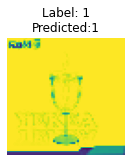

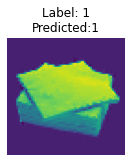

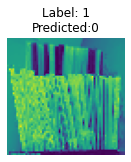

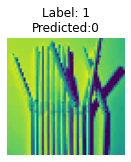

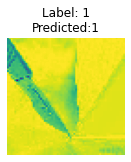

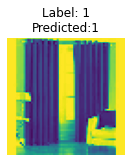

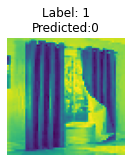

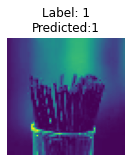

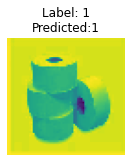

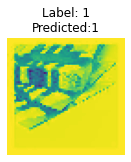

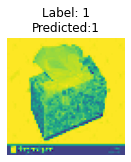

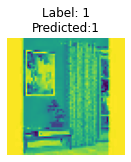

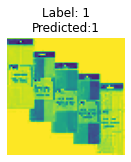

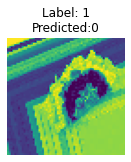

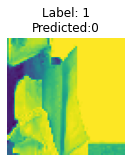

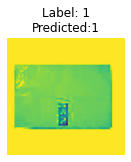

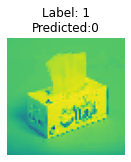

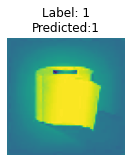

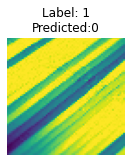

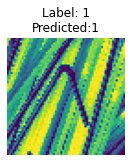

In [20]:
from matplotlib import pyplot as plt



score = model.evaluate(test_data, test_labels)
print('Test accuracy:', score[1]*100)

preds = model.predict(test_data)
n_examples = 20
plt.figure(figsize=(50, 50))
for i in range(n_examples):
  plt.figure(figsize=(50, 50))
  ax = plt.subplot(2, n_examples, i + 1)
  plt.imshow(test_data[i, :, :, 0])
  plt.title("Label: {}\nPredicted:{}".format(np.argmax(test_labels[i]), np.argmax(preds[i])))
  plt.axis('off')
  plt.show()

 Conclusion:  Hence, we were able to build a CNN model with less than 100,000 parameters and train it and fit the model. The above model  is able to predict the 'Bio waste' and 'Recyclable waste' with 86% accuracy  when  different pictures of organic/bio waste and plastic waste were tested for prediction. This model will work with much better accuracy when trained with more appropriate images in the dataset.

The results of this model are already quite nice. With a limited depth (one convolutional layer,one max pooling layer and one fully connected layer), and just around 10 epochs, we were able to get 85% accuracy on the test set. Our model has 92724 trainable parameters and runs 1 epoch in around 45 seconds on a GPU T4 x2.  With some of the additional techniques , we can try to boost our own test score for our model further. 

## 2. Improve the baseline model performance and save the weights of improved model (10 marks)
### Apply Data Augmentation (Must use Shearing, zooming, shifting, rotation)

A popular method to boost the performance of a network for computer vision tasks is to add data augmentation. By using data augmentation,during training time, we can increase the size of the training set. As aconsequence, we can makeyour model more robust to slight variations in the training data.

In [22]:
data_generator = ImageDataGenerator(rotation_range = 40,
                                    zoom_range = 0.25,
                                    width_shift_range = 0.2,
                                    height_shift_range = 0.2,
                                    shear_range = 0.2,
                                    horizontal_flip = True,
                                    fill_mode ='nearest')
data_generator.fit(train_data)
# standardize the test set
for i in range(len(test_data)):
 test_data[i] = data_generator.standardize(test_data[i])

### Creating the model on a dataset after Augmentation:

In [42]:
model1 = Sequential()
model1.add(Conv2D(64, (3, 3), padding='same', input_shape=train_data.shape[1:]))
model1.add(Activation('relu'))
model1.add(Conv2D(32, (3, 3)))
model1.add(Activation('relu'))
model1.add(MaxPooling2D(pool_size=(2, 2)))
model1.add(Dropout(0.25))
model1.add(Conv2D(16, (3, 3), padding='same'))
model1.add(Activation('relu'))
model1.add(Conv2D(16, (3, 3)))
model1.add(Activation('relu'))
model1.add(MaxPooling2D(pool_size=(2, 2)))
model1.add(Dropout(0.25))
model1.add(Flatten())
model1.add(Dense(512))
model1.add(Activation('relu'))
model1.add(Dropout(0.5))
model1.add(Dense(n_classes))
model1.add(Activation('softmax'))

opt = Adam()
model1.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])


In [43]:
model1.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_14 (Conv2D)           (None, 64, 64, 64)        1792      
_________________________________________________________________
activation_18 (Activation)   (None, 64, 64, 64)        0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 62, 62, 32)        18464     
_________________________________________________________________
activation_19 (Activation)   (None, 62, 62, 32)        0         
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 31, 31, 32)        0         
_________________________________________________________________
dropout_9 (Dropout)          (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 31, 31, 16)       

In [57]:
from keras.callbacks import EarlyStopping, TensorBoard, ModelCheckpoint

### Using callbacks to save the best model weights

In [58]:
callbacks = [EarlyStopping(monitor='val_acc', patience=5, verbose=2), ModelCheckpoint('checkpoints/weights.{epoch:02d}.hdf5', save_best_only=True), TensorBoard('~/notebooks/logs',
                                                                                      write_graph=True, write_grads=True, write_images=True, embeddings_freq=0, embeddings_layer_names=None, embeddings_metadata=None)]



2022-11-30 03:13:10.234143: I tensorflow/core/profiler/lib/profiler_session.cc:131] Profiler session initializing.
2022-11-30 03:13:10.234183: I tensorflow/core/profiler/lib/profiler_session.cc:146] Profiler session started.
2022-11-30 03:13:10.238902: I tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1614] Profiler found 2 GPUs
2022-11-30 03:13:11.094854: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session tear down.
2022-11-30 03:13:11.095046: I tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1748] CUPTI activity buffer flushed


In [59]:
model1.fit_generator(generator=data_generator.flow(x=train_data,y=train_labels,batch_size=batch_size),
                    steps_per_epoch=1,
                    epochs=10,
                    validation_data=(test_data, test_labels),
                    callbacks=callbacks)


/opt/conda/lib/python3.7/site-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
1/1 [==============================] - 1s 972ms/step - loss: 0.6378 - accuracy: 0.6250 - val_loss: 0.6527 - val_accuracy: 0.5552
Epoch 2/10


2022-11-30 03:13:16.332759: I tensorflow/core/profiler/lib/profiler_session.cc:131] Profiler session initializing.
2022-11-30 03:13:16.332831: I tensorflow/core/profiler/lib/profiler_session.cc:146] Profiler session started.


1/1 [==============================] - ETA: 0s - loss: 0.6259 - accuracy: 0.6250

2022-11-30 03:13:16.931106: I tensorflow/core/profiler/lib/profiler_session.cc:66] Profiler session collecting data.
2022-11-30 03:13:16.931943: I tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1748] CUPTI activity buffer flushed
2022-11-30 03:13:17.091834: I tensorflow/core/profiler/internal/gpu/cupti_collector.cc:673]  GpuTracer has collected 167 callback api events and 164 activity events. 
2022-11-30 03:13:17.108802: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session tear down.
2022-11-30 03:13:17.137771: I tensorflow/core/profiler/rpc/client/save_profile.cc:136] Creating directory: ~/notebooks/logs/train/plugins/profile/2022_11_30_03_13_17

2022-11-30 03:13:17.142048: I tensorflow/core/profiler/rpc/client/save_profile.cc:142] Dumped gzipped tool data for trace.json.gz to ~/notebooks/logs/train/plugins/profile/2022_11_30_03_13_17/0e017ea05987.trace.json.gz
2022-11-30 03:13:17.171652: I tensorflow/core/profiler/rpc/client/save_profile.cc:136] Creating di

1/1 [==============================] - 1s 1s/step - loss: 0.6259 - accuracy: 0.6250 - val_loss: 0.6538 - val_accuracy: 0.5620
Epoch 3/10
1/1 [==============================] - 1s 699ms/step - loss: 0.6182 - accuracy: 0.6250 - val_loss: 0.6179 - val_accuracy: 0.6398
Epoch 4/10
1/1 [==============================] - 1s 960ms/step - loss: 0.6371 - accuracy: 0.6875 - val_loss: 0.5799 - val_accuracy: 0.7502
Epoch 5/10
1/1 [==============================] - 1s 848ms/step - loss: 0.6248 - accuracy: 0.5938 - val_loss: 0.5775 - val_accuracy: 0.7558
Epoch 6/10
1/1 [==============================] - 1s 517ms/step - loss: 0.5671 - accuracy: 0.7578 - val_loss: 0.5548 - val_accuracy: 0.7647
Epoch 7/10
1/1 [==============================] - 1s 835ms/step - loss: 0.5530 - accuracy: 0.7656 - val_loss: 0.5559 - val_accuracy: 0.7276
Epoch 8/10
1/1 [==============================] - 1s 510ms/step - loss: 0.5626 - accuracy: 0.7266 - val_loss: 0.5798 - val_accuracy: 0.7002
Epoch 9/10
1/1 [==================

In [32]:
#model1.save("/content/drive/MyDrive/dataset_dnn/model1.h5")

78/78 [==============================] - 0s 5ms/step - loss: 0.5191 - accuracy: 0.7611
Test accuracy: 76.10797882080078


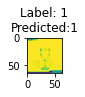

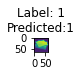

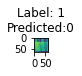

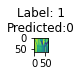

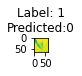

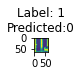

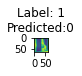

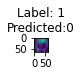

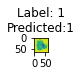

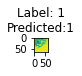

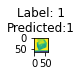

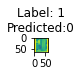

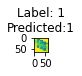

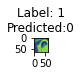

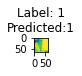

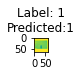

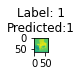

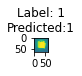

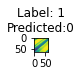

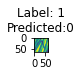

In [60]:
from matplotlib import pyplot as plt
score = model1.evaluate(test_data, test_labels)
print('Test accuracy:', score[1]*100)
preds = model1.predict(test_data)
n_examples = 20
plt.figure(figsize=(15, 15))
for i in range(n_examples):
  ax = plt.subplot(2, n_examples, i + 1)
  plt.imshow(test_data[i, :, :, 0])
  plt.title("Label: {}\nPredicted:{}".format(np.argmax(test_labels[i]), np.argmax(preds[i])))
  #plt.axis('off')
  plt.show()

In [48]:
input_shape=train_data.shape[1:]
model2 = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(n_classes, activation="softmax"),
    ]
)

In [61]:
batch_size = 128
epochs = 15

model2.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

model2.fit(train_data, train_labels, batch_size=batch_size, epochs=epochs, validation_split=0.1,callbacks=callbacks)

Epoch 1/15
  1/101 [..............................] - ETA: 38s - loss: 0.3708 - accuracy: 0.8594

2022-11-30 03:13:48.775439: I tensorflow/core/profiler/lib/profiler_session.cc:131] Profiler session initializing.
2022-11-30 03:13:48.775484: I tensorflow/core/profiler/lib/profiler_session.cc:146] Profiler session started.


  3/101 [..............................] - ETA: 26s - loss: 0.4600 - accuracy: 0.7917

2022-11-30 03:13:49.108301: I tensorflow/core/profiler/lib/profiler_session.cc:66] Profiler session collecting data.
2022-11-30 03:13:49.108817: I tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1748] CUPTI activity buffer flushed
2022-11-30 03:13:49.262793: I tensorflow/core/profiler/internal/gpu/cupti_collector.cc:673]  GpuTracer has collected 104 callback api events and 101 activity events. 
2022-11-30 03:13:49.267577: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session tear down.
2022-11-30 03:13:49.271778: I tensorflow/core/profiler/rpc/client/save_profile.cc:136] Creating directory: ~/notebooks/logs/train/plugins/profile/2022_11_30_03_13_49

2022-11-30 03:13:49.275115: I tensorflow/core/profiler/rpc/client/save_profile.cc:142] Dumped gzipped tool data for trace.json.gz to ~/notebooks/logs/train/plugins/profile/2022_11_30_03_13_49/0e017ea05987.trace.json.gz
2022-11-30 03:13:49.281003: I tensorflow/core/profiler/rpc/client/save_profile.cc:136] Creating di

101/101 [==============================] - 3s 23ms/step - loss: 0.4232 - accuracy: 0.8114 - val_loss: 0.3797 - val_accuracy: 0.8517
Epoch 2/15
101/101 [==============================] - 1s 15ms/step - loss: 0.4179 - accuracy: 0.8148 - val_loss: 0.4136 - val_accuracy: 0.8231
Epoch 3/15
101/101 [==============================] - 1s 14ms/step - loss: 0.4118 - accuracy: 0.8167 - val_loss: 0.2523 - val_accuracy: 0.9063
Epoch 4/15
101/101 [==============================] - 1s 14ms/step - loss: 0.4054 - accuracy: 0.8239 - val_loss: 0.3630 - val_accuracy: 0.8580
Epoch 5/15
101/101 [==============================] - 1s 15ms/step - loss: 0.4079 - accuracy: 0.8204 - val_loss: 0.4530 - val_accuracy: 0.7895
Epoch 6/15
101/101 [==============================] - 1s 14ms/step - loss: 0.4014 - accuracy: 0.8255 - val_loss: 0.3693 - val_accuracy: 0.8476
Epoch 7/15
101/101 [==============================] - 1s 15ms/step - loss: 0.4009 - accuracy: 0.8237 - val_loss: 0.3751 - val_accuracy: 0.8434
Epoch 8/15

78/78 [==============================] - 0s 4ms/step - loss: 0.3963 - accuracy: 0.8380
Test accuracy: 83.80338549613953


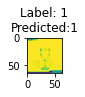

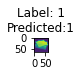

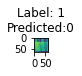

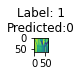

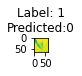

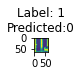

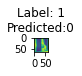

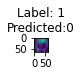

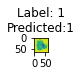

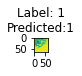

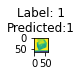

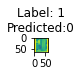

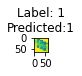

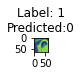

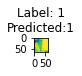

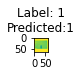

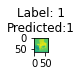

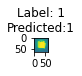

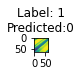

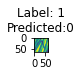

In [62]:
from matplotlib import pyplot as plt
score = model2.evaluate(test_data, test_labels)
print('Test accuracy:', score[1]*100)
preds = model1.predict(test_data)
n_examples = 20
plt.figure(figsize=(15, 15))
for i in range(n_examples):
  ax = plt.subplot(2, n_examples, i + 1)
  plt.imshow(test_data[i, :, :, 0])
  plt.title("Label: {}\nPredicted:{}".format(np.argmax(test_labels[i]), np.argmax(preds[i])))
  #plt.axis('off')
  plt.show()

We have used image augmentation techniques to expand ourdataset. We have done rotation range, random flipping, zooming, shearing and random scaling.

From the above two models it is clear that the second model accuracy is higher with 83% ,where the first model has an accuracy of 76%. 
This is because of the reduced dropout and the minimal usage of layers in the second model.
The reduction in dropout has led to the low number of parameters passed between layers.

Though we have built the second model with the image augmentation to expand our training dataset, the accuracy is not improved much compared to the initial model with 3 layers and less than 95,000 parameters.